In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import collections as co
from operator import itemgetter

In [2]:
##load data
data = pd.read_csv("parsed/cleaned.csv")

In [3]:
data.head(5)

,year,judge,clerk_school,a,aboard,about,absent,across,after,against,...,whose,will,with,within,without,would,yet,you,your,yourself
0,2006,LYNCH_SANDRA_L,UC Berkeley School of Law,0.075294,0.0,0.000000,0.05,0.0,0.037736,0.131980,...,0.0625,0.071429,0.035842,0.000000,0.081081,0.027027,0.000000,0.013889,0.0,0.0
1,2006,GIBBONS_JULIA_S,Georgetown Law School,0.112941,0.0,0.012987,0.00,0.0,0.037736,0.025381,...,0.0000,0.051020,0.053763,0.044776,0.027027,0.128378,0.117647,0.006944,0.0,0.0
2,2006,GIBBONS_JULIA_S,Emory University School of Law,0.112941,0.0,0.012987,0.00,0.0,0.037736,0.025381,...,0.0000,0.051020,0.053763,0.044776,0.027027,0.128378,0.117647,0.006944,0.0,0.0
3,2006,GIBBONS_JULIA_S,Yale Law School,0.112941,0.0,0.012987,0.00,0.0,0.037736,0.025381,...,0.0000,0.051020,0.053763,0.044776,0.027027,0.128378,0.117647,0.006944,0.0,0.0
4,2006,BAUER_WILLIAM_J,DePaul University College of Law,0.090588,0.0,0.077922,0.00,0.0,0.150943,0.015228,...,0.0000,0.010204,0.035842,0.000000,0.108108,0.020270,0.000000,0.000000,0.0,0.0


In [4]:
# info about the law schoos in the dataset 
print(data['clerk_school'].describe())

count                  32912
unique                   168
top       Harvard Law School
freq                    3566
Name: clerk_school, dtype: object


In [5]:
#data.shape
#data size
print ('The data has {0} rows and {1} columns\n'.format(data.shape[0],data.shape[1]))

The data has 32912 rows and 190 columns



# Distribution of the whole dataset

In [6]:
schCnt = co.Counter(data['clerk_school'])
top10 = schCnt.most_common(10)
print("The top 10 law schools in the whole data set:\n",top10)

The top 10 law schools in the whole data set:
 [('Harvard Law School', 3566), ('Yale Law School', 3038), ('Stanford Law School', 1641), ('Chicago Law School', 1630), ('Georgetown Law School', 1161), ('Columbia Law School', 1060), ('New York University School of Law', 965), ('Northwestern University Pritzker School of Law', 959), ('UC Berkeley School of Law', 907), ('9999', 763)]


In [7]:
#plot distribution of the law school for the whole dataset
proDict = {}
for sch, cnt in schCnt.items():
    proDict.update({sch: cnt/ data.shape[0]})

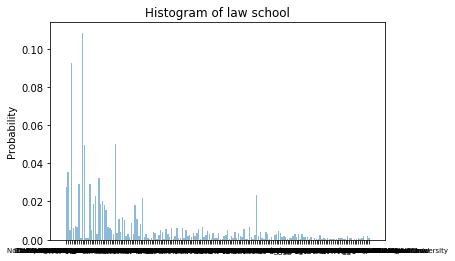

In [8]:
y_pos = np.arange(len(proDict.items())) 
plt.bar(y_pos,proDict.values() , align='center', alpha=0.5)
plt.xticks(y_pos, proDict.keys() , fontsize = 7)
plt.ylabel('Probability')
plt.title('Histogram of law school')
plt.show()

# Modeling and Evaluation

In [10]:
y = data['clerk_school']
X = data.drop(['clerk_school','judge'], axis=1)
#split trainng dataset and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state = 44)

# Using the school distribution to do the prediction 

In [11]:
##using the school distribution to do the prediction 
train_sch_cnt = co.Counter(y_train)
train_top10 = train_sch_cnt.most_common(10)
print("The top 10 law schools in the training data set:\n",train_top10)

The top 10 law schools in the training data set:
 [('Harvard Law School', 2674), ('Yale Law School', 2263), ('Stanford Law School', 1233), ('Chicago Law School', 1209), ('Georgetown Law School', 879), ('Columbia Law School', 796), ('New York University School of Law', 749), ('Northwestern University Pritzker School of Law', 730), ('UC Berkeley School of Law', 685), ('University of Michigan Law School', 561)]


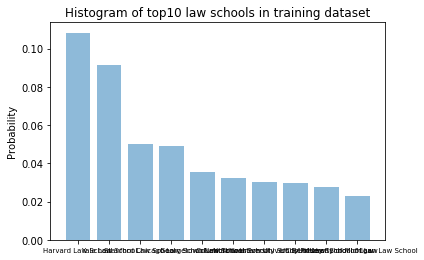

In [12]:
#plot distribution of the law school for the training dataset
train_top10Sch = []
train_top10Prob = []
for i in range(len(train_top10)):
    train_top10Sch.append(train_top10[i][0])
    train_top10Prob.append(train_top10[i][1]/len(y_train))
y_pos = np.arange(len(train_top10Sch)) 
plt.bar(y_pos,train_top10Prob , align='center', alpha=0.5)
plt.xticks(y_pos, train_top10Sch , fontsize = 7)
plt.ylabel('Probability')
plt.title('Histogram of top10 law schools in training dataset')
plt.show()

In [14]:
##using the top1 school in training set (Harvard) as the predicted school for all the casese in test set
train_cnt = 0
for y in y_train:
    if y == 'Harvard Law School':
        train_cnt += 1   
train_score = train_cnt / len(y_train)
print("The accuracy on training set by using the school distribution to do the prediction: \n", train_score)

The accuracy on training set by using the school distribution to do the prediction: 
 0.10832928212607357


In [15]:
test_cnt = 0
for y in y_test:
    if y == 'Harvard Law School':
        test_cnt += 1   
test_score = test_cnt / len(y_test)
print("The accuracy on test set by using the school distribution to do the prediction: \n", test_score)

The accuracy on test set by using the school distribution to do the prediction: 
 0.10841030627126884


# Naive Bayes

In [16]:
##Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None)

In [17]:
nb_score_train = nb.score(X_train, y_train)

In [18]:
print("NB accuracy on training set: ", nb_score_train)

NB accuracy on training set:  0.04577864203532653


In [20]:
nb_score_test = nb.score(X_test, y_test)
print("NB accuracy on test set: ", nb_score_test)

NB accuracy on test set:  0.010087506076810889


# Logit

In [21]:
##logit
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

0.1273699562469616

In [22]:
logreg.score(X_test, y_test)

0.10622265435099659

In [23]:
##logit wich PCA
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_r = pca.fit(X).transform(X)
X_r.shape
y = data['clerk_school']

In [24]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_r, y, test_size=0.25, random_state=44)
logreg_PCA = linear_model.LogisticRegression(C=1e8)
logreg_PCA.fit(Xr_train, yr_train)

LogisticRegression(C=100000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [25]:
logreg_PCA.score(Xr_train, yr_train)

0.137772376074312

In [26]:
logreg_PCA.score(Xr_test, yr_test)

0.11160623860644116

# Boosting

In [27]:
#boosting
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
gbst = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gbst.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [28]:
gbst.score(X_train, y_train)

0.007332685140171771

In [29]:
gbst.score(X_test, y_test)

0.007778317938745746

# Random forest

In [30]:
##rf with 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100, random_state=44)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=44, verbose=0, warm_start=False)

In [31]:
rf.score(X_train, y_train)

0.563441905687895

In [32]:
rf.score(X_test, y_test)

0.03682547399124939

In [33]:
##rf with 500 trees
rf1 = RandomForestClassifier(n_estimators= 500, random_state=44)
rf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=44, verbose=0, warm_start=False)

In [34]:
rf1.score(X_train, y_train)

0.563441905687895

In [35]:
rf1.score(X_test, y_test)

0.038283908604764216

# Neural network

In [36]:
##nnet
from sklearn.neural_network import MLPClassifier
nnet = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(3, 300), random_state=44)
nnet.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 300), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=44, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [37]:
nnet.score(X_train, y_train)

0.10832928212607357

In [38]:
nnet.score(X_test, y_test)

0.10841030627126884